In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
genus = pd.read_csv('../../data/raw/illumina/Genus-level microbiota.csv')
genus.head(10)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Celeribacter,Kordia,Friedmanniella,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium
0,UAB 17001,13.0064,17.8058,12.5382,0.6828,0.0650,1.8859,6.4642,1.5543,1.1706,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
1,UAB 17002,1.5782,0.0121,0.0081,0.0060,0.0845,1.4474,0.0040,0.0000,0.0040,...,0.002,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
2,UAB 17003,22.6964,9.1674,9.7704,6.9938,5.4781,0.4794,0.0685,19.7984,0.1258,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
3,UAB 17004,4.6980,0.7457,13.2737,0.2237,0.8203,6.4131,0.0000,0.9694,0.0000,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
4,UAB 17005,31.2522,7.9544,7.2007,1.8893,10.5617,7.8882,0.6366,0.0560,0.2648,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
5,UAB 17006,44.0232,12.9235,4.7403,0.0048,6.0025,3.2742,0.0000,0.0064,0.0161,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0016,0.0
6,UAB 17007,0.0513,0.0039,0.1842,0.0026,23.3051,30.6674,0.0000,0.5117,0.0013,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
7,UAB 17008,16.7037,31.7945,1.3631,9.2469,0.0707,1.2432,0.0000,2.0680,4.8445,...,0.000,0.0,0.0004,0.0,0.0004,0.0,0.0,0.0,0.0000,0.0
8,UAB 17009,5.4783,7.3148,27.1378,0.7582,5.3901,0.1187,0.0000,9.4521,1.2343,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
9,UAB 17010,9.3313,1.2029,1.7138,0.0393,24.3782,0.0477,12.3702,2.7764,0.0000,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0


## Fertility & Infertility

In [3]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
genus['fertility'] = genus['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
genus['fertility'] = np.where(genus['fertility'] == 'CON', 1, 0)

#### PCA

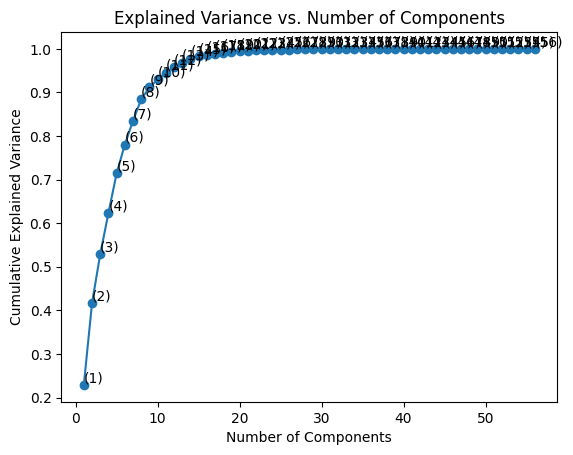

In [4]:
features = genus.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [5]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

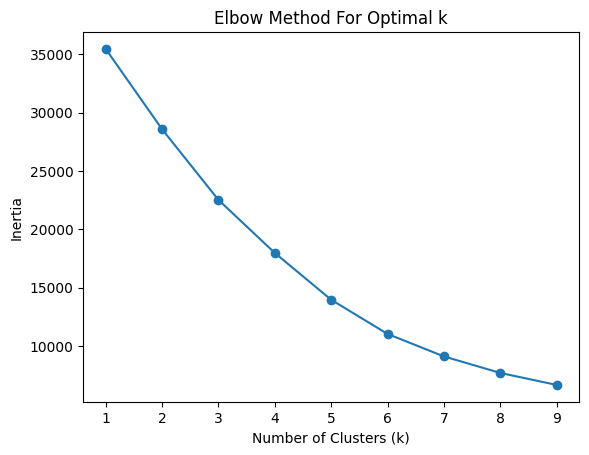

In [6]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


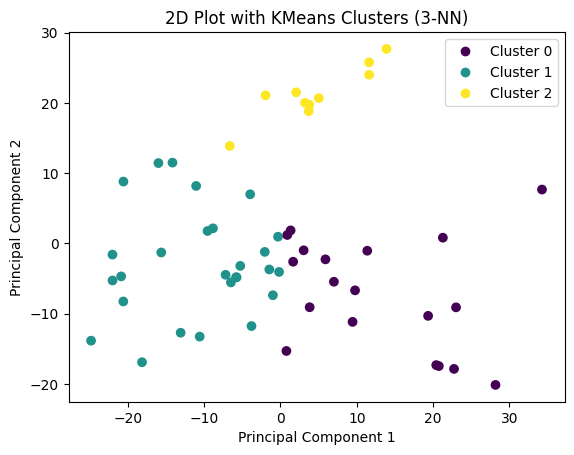

In [7]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
genus['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [8]:
# Add a new column for each combination of cluster and fertility
genus['cluster_fertility'] = genus['cluster'].astype(str) + '_' + genus['fertility'].astype(str)
genus.head(5)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium,fertility,cluster,cluster_fertility
0,UAB 17001,13.0064,17.8058,12.5382,0.6828,0.0650,1.8859,6.4642,1.5543,1.1706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1_0
1,UAB 17002,1.5782,0.0121,0.0081,0.0060,0.0845,1.4474,0.0040,0.0000,0.0040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0_0
2,UAB 17003,22.6964,9.1674,9.7704,6.9938,5.4781,0.4794,0.0685,19.7984,0.1258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1_0
3,UAB 17004,4.6980,0.7457,13.2737,0.2237,0.8203,6.4131,0.0000,0.9694,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0_0
4,UAB 17005,31.2522,7.9544,7.2007,1.8893,10.5617,7.8882,0.6366,0.0560,0.2648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1_0


#### MLP

In [9]:
X = genus.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = genus['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [11]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.33
              precision    recall  f1-score   support

         0_0       0.00      0.00      0.00         4
         1_0       0.36      1.00      0.53         4
         1_1       0.00      0.00      0.00         3
         2_0       0.00      0.00      0.00         1

    accuracy                           0.33        12
   macro avg       0.09      0.25      0.13        12
weighted avg       0.12      0.33      0.18        12

[[0 4 0 0]
 [0 4 0 0]
 [0 3 0 0]
 [0 0 1 0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


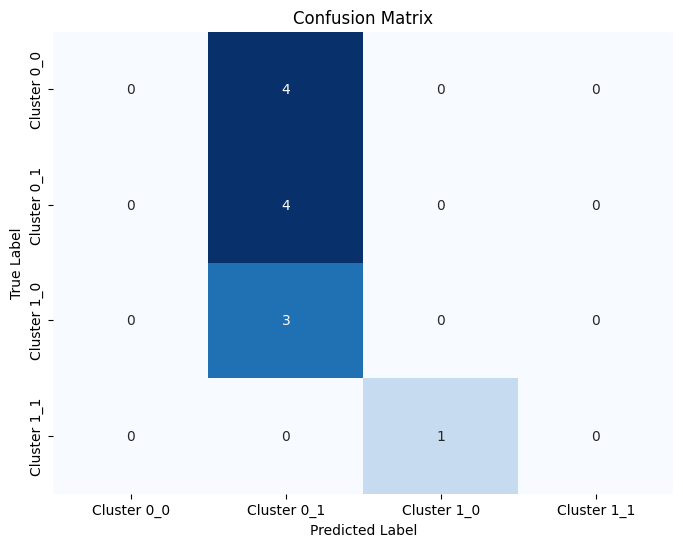

In [12]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# save the MLP model
filename = 'genus_mlp'
pickle.dump(mlp, open(filename, 'wb'))